In [35]:
# Importing the dependencies.
import yfinance as yf
import pandas as pd
import os

In [36]:
# Getting stock market data.
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

In [37]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-08-07 00:00:00-04:00,4491.580078,4519.839844,4491.149902,4518.439941,3493920000,0.0,0.0
2023-08-08 00:00:00-04:00,4498.029785,4503.310059,4464.390137,4499.379883,3884910000,0.0,0.0
2023-08-09 00:00:00-04:00,4501.569824,4502.439941,4461.330078,4467.709961,3803100000,0.0,0.0


In [38]:
sp500.index = pd.to_datetime(sp500.index, utc=True).date



In [39]:
sp500.index

Index([1927-12-30, 1928-01-03, 1928-01-04, 1928-01-05, 1928-01-06, 1928-01-09,
       1928-01-10, 1928-01-11, 1928-01-12, 1928-01-13,
       ...
       2023-07-31, 2023-08-01, 2023-08-02, 2023-08-03, 2023-08-04, 2023-08-07,
       2023-08-08, 2023-08-09, 2023-08-10, 2023-08-11],
      dtype='object', length=24018)

In [40]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-08-07,4491.580078,4519.839844,4491.149902,4518.439941,3493920000,0.0,0.0
2023-08-08,4498.029785,4503.310059,4464.390137,4499.379883,3884910000,0.0,0.0
2023-08-09,4501.569824,4502.439941,4461.330078,4467.709961,3803100000,0.0,0.0
2023-08-10,4487.160156,4527.370117,4457.919922,4468.830078,4504370000,0.0,0.0


**Cleaning and visualizing our stock market data.**

<Axes: >

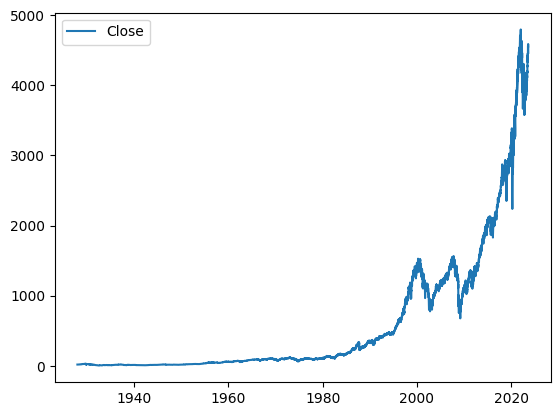

In [41]:
sp500.plot.line(y="Close", use_index=True)

In [42]:
# We will not be using the 'Dividends' and 'Stock Splits' columns to train our model.
del sp500["Dividends"]
del sp500["Stock Splits"]


In [43]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [46]:
# The target column is the column that we're going to be predicting using machine learning. We're trying to predict whether our price will increase or decrease tomorrow.
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)


In [45]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-08-07,4491.580078,4519.839844,4491.149902,4518.439941,3493920000,4499.379883,0
2023-08-08,4498.029785,4503.310059,4464.390137,4499.379883,3884910000,4467.709961,0
2023-08-09,4501.569824,4502.439941,4461.330078,4467.709961,3803100000,4468.830078,1
2023-08-10,4487.160156,4527.370117,4457.919922,4468.830078,4504370000,4464.049805,0


In [ ]:
# Removing pre-1990 data with the assumption that it will improve the model prediction.
startdate = pd.to_datetime("1990-01-01").date()
enddate = pd.to_datetime("2023-08-11").date()
sp500_latest = sp500.loc[startdate:enddate]

sp500_latest



,Open,High,Low,Close,Volume,Tomorrow,Target
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-08-07,4491.580078,4519.839844,4491.149902,4518.439941,3493920000,4499.379883,0
2023-08-08,4498.029785,4503.310059,4464.390137,4499.379883,3884910000,4467.709961,0
2023-08-09,4501.569824,4502.439941,4461.330078,4467.709961,3803100000,4468.830078,1
2023-08-10,4487.160156,4527.370117,4457.919922,4468.830078,4504370000,4464.049805,0


**Training an Initial Machine Learning Model**

In [ ]:
# RandomForestClassifier as an initial model.
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.5409836065573771

<Axes: >

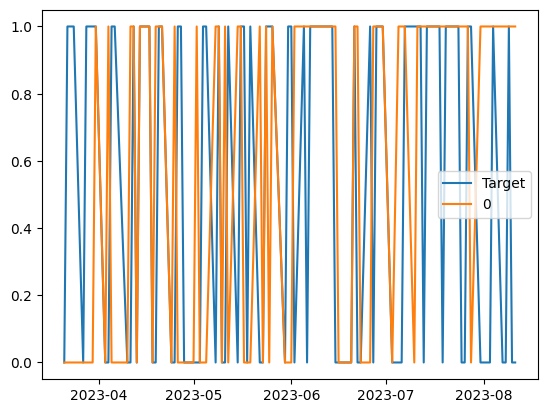

In [ ]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [ ]:
predictions = backtest(sp500, model, predictors)

In [ ]:
predictions["Predictions"].value_counts()


0    12141
1     9377
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])


0.5169030606803882

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]


1    0.525978
0    0.474022
Name: Target, dtype: float64

In [ ]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]

In [ ]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
1931-12-29,7.960000,7.960000,7.960000,7.960000,0,8.100000,1,1.012723,1.0,0.996994,3.0,0.821282,24.0,0.582074,105.0,0.394305,521.0
1931-12-30,8.100000,8.100000,8.100000,8.100000,0,8.120000,1,1.008717,2.0,1.019381,3.0,0.837787,25.0,0.593657,105.0,0.401432,521.0
1931-12-31,8.120000,8.120000,8.120000,8.120000,0,7.560000,0,1.001233,2.0,1.017544,4.0,0.842149,25.0,0.596489,105.0,0.402615,522.0
1932-01-04,7.560000,7.560000,7.560000,7.560000,0,7.550000,0,0.964286,1.0,0.956962,3.0,0.785781,25.0,0.556754,104.0,0.375034,522.0
1932-01-05,7.550000,7.550000,7.550000,7.550000,0,8.080000,1,0.999338,0.0,0.960804,3.0,0.787963,24.0,0.557255,104.0,0.374726,521.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-07,4491.580078,4519.839844,4491.149902,4518.439941,3493920000,4499.379883,0,1.004492,1.0,1.000165,1.0,1.033779,34.0,1.111919,121.0,1.179718,535.0
2023-08-08,4498.029785,4503.310059,4464.390137,4499.379883,3884910000,4467.709961,0,0.997886,1.0,0.999368,1.0,1.027972,34.0,1.106818,121.0,1.174248,534.0
2023-08-09,4501.569824,4502.439941,4461.330078,4467.709961,3803100000,4468.830078,1,0.996468,0.0,0.994351,1.0,1.019403,34.0,1.098749,120.0,1.165513,533.0
2023-08-10,4487.160156,4527.370117,4457.919922,4468.830078,4504370000,4464.049805,0,1.000125,1.0,0.996066,2.0,1.018371,34.0,1.098742,121.0,1.165328,534.0


In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined


In [ ]:
predictions = backtest(sp500, model, new_predictors)


In [ ]:
predictions["Predictions"].value_counts()

0.0    17400
1.0     3118
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5971776779987171

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.528658
0    0.471342
Name: Target, dtype: float64

In [ ]:
predictions

,Target,Predictions
1942-01-07,0,0.0
1942-01-08,0,0.0
1942-01-09,0,0.0
1942-01-12,1,0.0
1942-01-13,0,0.0
...,...,...
2023-08-07,0,0.0
2023-08-08,0,0.0
2023-08-09,1,0.0
2023-08-10,0,0.0
